# Mini project

In [4]:
import numpy as np
import pandas as pd

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [5]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
# Step 0: Preprocessing + EDA + Feature selection

# remove the unnamed column as it is unnecessary
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


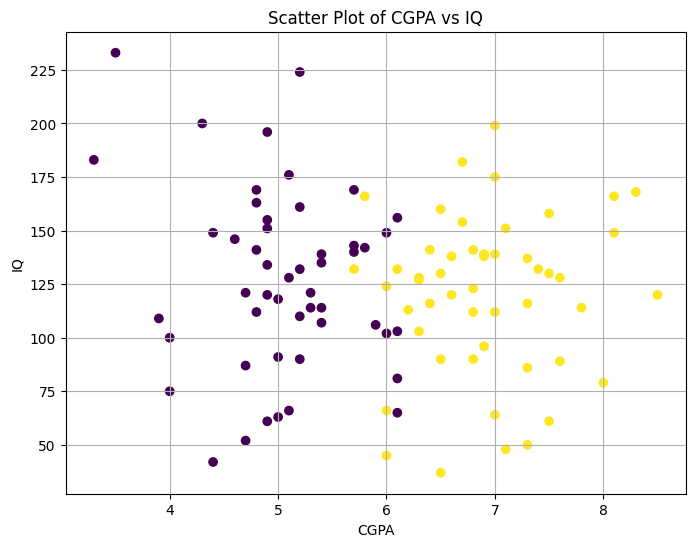

In [10]:
# Exploratory data analysis (EDA)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ')
plt.grid(True)
plt.show()

In [11]:
# Step 1: Extract input and output columns
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
# Step 2: Train - Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [20]:
# Step 3: Scale the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_train

array([[ 1.38073344,  0.8619171 ],
       [-1.02097183,  0.98707447],
       [ 1.20282934,  0.33625614],
       [-2.17734843,  2.73927767],
       [-0.48725955,  0.38631909],
       [ 1.38073344,  0.16103582],
       [-0.66516364,  2.5139944 ],
       [-0.75411569,  0.11097287],
       [ 1.02492525, -1.89154507],
       [ 0.49121297,  0.91198005],
       [-0.13145136,  0.46141351],
       [ 0.58016502,  0.36128761],
       [-0.57621159, -0.23946777],
       [ 1.46968548,  0.11097287],
       [-0.75411569,  1.31248363],
       [-0.48725955, -0.23946777],
       [ 0.31330888,  0.11097287],
       [-0.2204034 ,  0.41135056],
       [-0.66516364,  0.93701152],
       [ 1.64758958, -0.23946777],
       [ 0.04645274,  0.63663383],
       [-2.35525253,  1.48770395],
       [-1.10992387, -0.06424745],
       [ 0.75806911, -0.28953072],
       [ 1.29178139,  0.21109877],
       [ 0.13540478,  0.81185415],
       [ 0.04645274, -0.53984546],
       [-1.7325882 , -0.58990841],
       [-0.2204034 ,

In [21]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.04645274,  0.01084697],
       [ 0.40226092,  0.43638203],
       [-0.93201978,  1.81311312],
       [ 1.38073344, -1.56613591],
       [-1.7325882 , -1.21569527],
       [ 0.13540478, -0.51481399],
       [ 1.20282934, -0.18940482],
       [ 0.75806911, -0.0141845 ],
       [ 0.49121297,  0.16103582],
       [ 2.09234981,  1.11223184]])

In [22]:
# Step 4: Train the model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
# model training
clf.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Step 5: Evaluate the model

clf.predict(X_test) # gives the predicted output based on the model's training

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [24]:
# Actual output of test values
y_test

27    1
54    1
80    0
44    1
68    0
14    0
72    1
0     1
57    1
53    1
Name: placement, dtype: int64

In [25]:
# Compare them side by side
y_pred = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8

<Axes: >

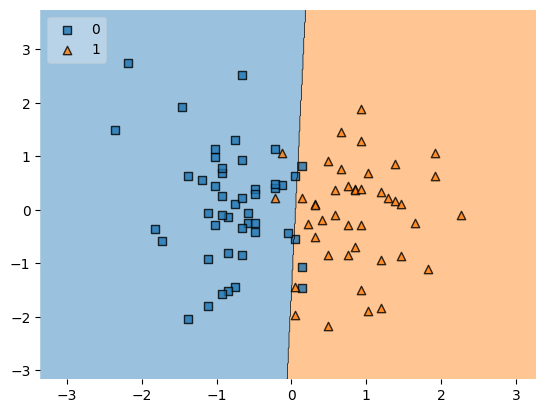

In [27]:
# Plot the decision boundary
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend = 2)

In [ ]:
# Export the model using pickle